In [1]:
%load_ext nb_black
import itertools, sys

import catboost as cb
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

wids_path = ".."
sys.path.append(wids_path)
import global_vars as gv

# from global_vars import all_feature_columns, response_column
from utils import visualize as viz

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

<IPython.core.display.Javascript object>

In [2]:
def plot_train_and_test_rmse(rmse_df):
    fig, axes = plt.subplots(figsize=(11, 9), nrows=2)
    sns.boxplot(
        data=rmse_df.query("method == 'loyo'").sort_values("config"),
        x="config",
        y="train_rmse",
        ax=axes[0],
    )
    viz.add_median_labels(axes[0])
    sns.scatterplot(
        data=rmse_df.query("method == 'whole train'").sort_values("config"),
        x="config",
        y="train_rmse",
        ax=axes[0],
        color="white",
        edgecolor="k",
        label="whole train",
    )
    _ = axes[0].set_xticklabels([])
    axes[0].legend(bbox_to_anchor=(1, 1))

    sns.boxplot(
        data=rmse_df.sort_values("config"),
        x="config",
        y="test_rmse",
        ax=axes[1],
    )
    _ = axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    axes[1].legend(bbox_to_anchor=(1, 1))
    viz.add_median_labels(axes[1])
    fig.subplots_adjust(hspace=0)

<IPython.core.display.Javascript object>

In [4]:
def combine_rmse_results(config_name_list):
    rmse_df = pd.DataFrame()
    for config_name in config_name_list:
        try:
            _df = pd.read_csv(
                f"{wids_path}/validation_result/meng/{config_name}.csv"
            ).assign(config=config_name)
            rmse_df = pd.concat([rmse_df, _df], axis=0)
        except:
            print(f"{config_name}.csv not found")
        rmse_df = rmse_df.reset_index(drop=True)
    return rmse_df

<IPython.core.display.Javascript object>

In [6]:
wids_path = ".."
model_configs_to_run = [
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_catboost_v8",
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_catboost_v9",
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_catboost_v10",
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_catboost_v11",
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_catboost_v12",
    "log_temp_pca_onehot_iter_impute_star_parse_upsamplesmote_lightgbm_v13",
]
rmse_df = combine_rmse_results(model_configs_to_run)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


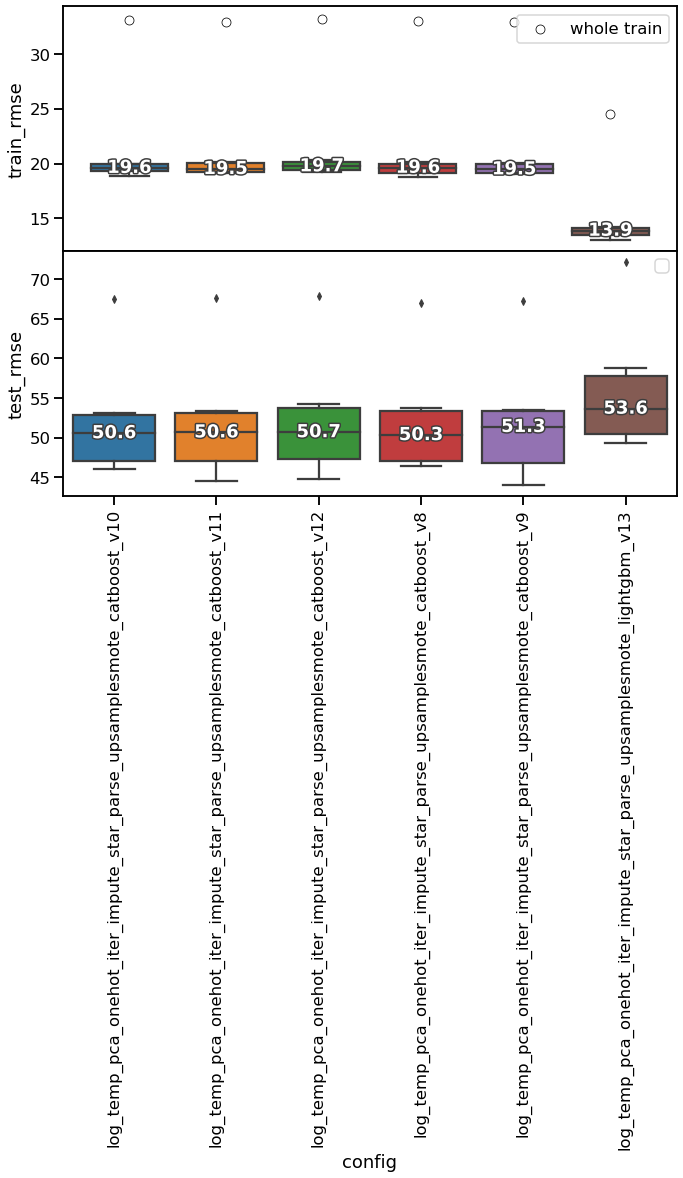

<IPython.core.display.Javascript object>

In [7]:
plot_train_and_test_rmse(rmse_df)